# A sweep of tone spacing for the AWG calibration

In [1]:
# import the pyMez packages default API
from pyMez import *
# import the Fitting module for Signal Generation and Fitting, note the namespace Code.Analysis.Fitting also works
from pyMez.Code.Analysis.Fitting import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.806 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.13 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
The module smithplot was not found,please put it on the python path
It took 1.357 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
It took 0.02 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.16 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.024 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.751 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.01 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Name

## Setup Variables that do not change with tone spacing

In [2]:
# none of these instruments have xml instrument sheets, need to add them
psg_address="GPIB1::19"
vna_address="GPIB1::16"
awg_address="GPIB1::10"
scope_address="GPIB1::7::INSTR"
pm_address="GPIB1::13"
# ----------------------
vna=VNA(vna_address)
scope=HighSpeedOscope(scope_address)
awg=VisaInstrument(awg_address)
pm=PowerMeter(pm_address)
# ----------------


# this is local to the computer taking the data, the data should be copied to Q:\public\Aric\AWG_Phase_Calibration_20180927
data_directory=r'C:\Share\AWG_Full_Calibration_20181022\Schroeder_Phase\Scope_Gamma_Measurement'
# Experimental variables

# the psg frequency acts as the master clock
psg_amplitude=12. #psg amplitude in dBm
psg_frequency=10.*10.**9 # 10 GHz
time_step=1./psg_frequency # time step for the awg
fundamental_frequency = 1.*10.**9 # Center of the passband or fundemental frequency in Hz
number_tones = 11 # Number of tones in the modulation bandwidth including the fundamental, should be odd
number_harmonics = 1# Number of harmonics to use. The frequency grid will be n*(f-df), n*f, n*(f+df), etc
# Select the phase for the multisine    
#multisine_phase="zero"
multisine_phase="schroeder"
number_envelopes=1.

# Measurement Phase Reference Setup 
round_multisine_before_writing=True # Rounds the multisine to a desired bitdepth before writing to AWG
bit_depth=8
waveform_name="Calibration_Phase_Reference" # name of the waveform to write to the 
bin_format=True # If the wave is in 16 bit bin format
marker_1=False # If marker one is to be set
marker_1_n_repeats=1 # the rep rate of the marker as a function of number of repeats per time sequence
marker_2=False
marker_2_n_repeats=1

# VNA setup 
vna_IFBW=10
comb_frequency = 2.5*10**6
number_phases=1
vna.set_IFBW(vna_IFBW)

# Power Meter Setup
# pm.set_units("W")

The information sheet was not found defaulting to address
The information sheet was not found defaulting to address
The information sheet was not found defaulting to address
The information sheet was not found defaulting to address


In [3]:
# Setup the traces that we might want
# Delete all of the traces that we do not need, in this case I will delete  all of them it leaves one trace
trace_string=vna.query("CALC:PAR:CAT?")
trace_list=trace_string.replace("\n","").split(",")[0::3] #remove endline, split on , and then take every third one
for trace in trace_list:
    vna.write("CALC:PAR:DEL '{0}'".format(trace))
print("Existing traces are {0}".format(vna.query("CALC:PAR:CAT?")))
# set up the traces, we use drive_port=1 sense all of the inputs are turned off, there are combs on port 2, port 3

# first we add a trace for a each reference reciever (R1=a1)
for i in range(4):
    vna.add_trace(trace_name="a{0}".format(i+1),trace_parameter="R{0}".format(i+1),drive_port=1)
# now we add a trace for each b reciever (labelled A,B,C,D)
for i,receiver in enumerate(["A","B","C","D"]):
    vna.add_trace(trace_name="b{0}".format(i+1),trace_parameter="{0}".format(receiver),drive_port=1)
    
# now we want a ratio of R1R4 (a1/a4) <- this is the calibration phase reference / measurement phase reference
vna.add_trace(trace_name="ratio",trace_parameter="R1R4",drive_port="1")
vna.add_trace(trace_name="b_ratio",trace_parameter="b1a4",drive_port="1")

vna.add_trace(trace_name="comb_ratio",trace_parameter="a1b2",drive_port="1")
print("Existing traces are {0}".format(vna.query("CALC:PAR:CAT?")))

Existing traces are "a1,a1,1"

Existing traces are "a1,a1,1,a2,R2,1,a3,R3,1,a4,R4,1,b1,A,1,b2,B,1,b3,C,1,b4,D,1,ratio,R1/R4,1,b_ratio,b1/a4,1,comb_ratio,a1/b2,1"



In [4]:
tone_spacings=[10*10**6,5*10**6,2.5*10**6,2.5*10**5,2.5*10**4]
comb_spacings=[10*10**6,5*10**6,2.5*10**6]

In [5]:
for tone_spacing in tone_spacings:
    comb_spacing=tone_spacing in comb_spacings
    print(comb_spacing)

True
True
True
False
False


Calibration Began at 2018-10-22 12:32:21.107000
Sweep 0 
f : 950000000.0
 began at 2018-10-22 12:32:21.107000 
Writing to AWG Began at 2018-10-22 12:32:21.117000 
Measuring on VNA  Began at 2018-10-22 12:32:23.226000 
Measuring on Scope  Began at 2018-10-22 12:32:28.543000 
Sweep 0 
f : 950000000.0
 ended at 2018-10-22 12:32:28.664000
 taking 7 seonds 
Sweep 1 
f : 960000000.0
 began at 2018-10-22 12:32:28.664000 
Writing to AWG Began at 2018-10-22 12:32:28.684000 
Measuring on VNA  Began at 2018-10-22 12:32:30.761000 
Measuring on Scope  Began at 2018-10-22 12:32:36.104000 
Sweep 1 
f : 960000000.0
 ended at 2018-10-22 12:32:36.224000
 taking 7 seonds 
Sweep 2 
f : 970000000.0
 began at 2018-10-22 12:32:36.224000 
Writing to AWG Began at 2018-10-22 12:32:36.234000 
Measuring on VNA  Began at 2018-10-22 12:32:38.294000 
Measuring on Scope  Began at 2018-10-22 12:32:43.556000 
Sweep 2 
f : 970000000.0
 ended at 2018-10-22 12:32:43.666000
 taking 7 seonds 
Sweep 3 
f : 980000000.0
 began

Measuring on VNA  Began at 2018-10-22 12:35:43.958000 
Measuring on Scope  Began at 2018-10-22 12:35:49.245000 
Sweep 4 
f : 997500000.0
 ended at 2018-10-22 12:35:49.365000
 taking 7 seonds 
Sweep 5 
f : 1000000000.0
 began at 2018-10-22 12:35:49.365000 
Writing to AWG Began at 2018-10-22 12:35:49.405000 
Measuring on VNA  Began at 2018-10-22 12:35:51.527000 
Measuring on Scope  Began at 2018-10-22 12:35:56.886000 
Sweep 5 
f : 1000000000.0
 ended at 2018-10-22 12:35:57.006000
 taking 7 seonds 
Sweep 6 
f : 1002500000.0
 began at 2018-10-22 12:35:57.006000 
Writing to AWG Began at 2018-10-22 12:35:57.046000 
Measuring on VNA  Began at 2018-10-22 12:35:59.162000 
Measuring on Scope  Began at 2018-10-22 12:36:04.456000 
Sweep 6 
f : 1002500000.0
 ended at 2018-10-22 12:36:04.576000
 taking 7 seonds 
Sweep 7 
f : 1005000000.0
 began at 2018-10-22 12:36:04.576000 
Writing to AWG Began at 2018-10-22 12:36:04.636000 
Measuring on VNA  Began at 2018-10-22 12:36:06.786000 
Measuring on Scope 

Writing to AWG Began at 2018-10-22 12:40:05.011000 
Measuring on VNA  Began at 2018-10-22 12:40:09.098000 
Measuring on Scope  Began at 2018-10-22 12:40:14.367000 
Sweep 9 
f : 1000100000.0
 ended at 2018-10-22 12:40:14.487000
 taking 11 seonds 
Sweep 10 
f : 1000125000.0
 began at 2018-10-22 12:40:14.487000 
Writing to AWG Began at 2018-10-22 12:40:16.637000 
Measuring on VNA  Began at 2018-10-22 12:40:20.737000 
Measuring on Scope  Began at 2018-10-22 12:40:26.039000 
Sweep 10 
f : 1000125000.0
 ended at 2018-10-22 12:40:26.159000
 taking 11 seonds 


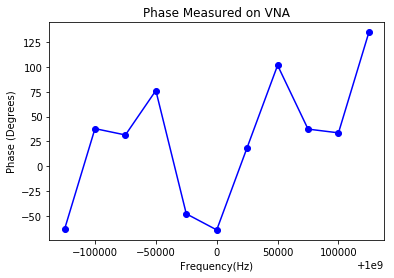

In [6]:
for tone_spacing in tone_spacings:
    comb_spacing = tone_spacing in comb_spacings
    summary_data=[]
    # now calculate the frequency_list
    frequency_list=[]
    for harmonic in range(number_harmonics):
        frequency_array=np.linspace((harmonic+1)*(fundamental_frequency-tone_spacing*(number_tones-1)/2),
                                    (harmonic+1)*(fundamental_frequency+tone_spacing*(number_tones-1)/2),number_tones)
        frequency_list=frequency_list+frequency_array.tolist()
    time_max=number_envelopes/tone_spacing
    number_time_points=int(round(time_max/time_step))
    time_shift=0.*time_step
    sweep_wait_time=2.5*float(len(frequency_list))/float(vna_IFBW)
    sweep_directory=os.path.join(data_directory,"{0}_Tones_{1:.0f}KHz_Spacing".format(number_tones,10**-3*tone_spacing))
    os.mkdir(sweep_directory)
    # first create the multisine
    sine_function=FunctionalModel(parameters=["f","phi"],variables=["t"],equation="cos(2*pi*f*t+phi)")
    time_list=np.linspace(0.+time_shift,time_max+time_shift-time_step,number_time_points)

    # calculate the phases 
    phase_list = [0. for i in range(len(frequency_list))]
    if re.search("sch",multisine_phase,re.IGNORECASE):
        phase_list=[]
        for frequency_index,frequency in enumerate(frequency_list):
            k=(frequency_index+1)%number_tones
            schroeder_phase=-k*(k-1)*np.pi/number_tones
            phase_list.append(schroeder_phase)
    # initialize multisine to a set of zeros
    multisine=np.array([0 for i in range(number_time_points)])
    # add each component
    for frequency_index,frequency in enumerate(frequency_list):
        sine_function.set_parameters({"f":frequency,"phi":phase_list[frequency_index]})
        multisine_component=sine_function(time_list)
        multisine=multisine+multisine_component

    # substract the mean
    # multisine=multisine-np.mean(multisine)
    # normalize the multisine
    # multisine=1/max(multisine)*multisine

    # round the multisine to the nearest bitdepth before writing
    if round_multisine_before_writing:
        discrete_steps=np.linspace(min(multisine),max(multisine),2**bit_depth)
        rounded_multisine=[]
        int_multisine=[]
        for value in multisine:
            difference_array=abs(discrete_steps-value)
            minimum_location=np.argmin(difference_array)
            rounded_multisine.append(discrete_steps[minimum_location])
            int_multisine.append(minimum_location)
        if bin_format:
            multisine=np.array(int_multisine,dtype=np.uint16)
            # Shift, now to add the marker add + 2**14 or +2**15 at the desired location
            multisine=multisine*2**6
        else:
            multisine=rounded_multisine

    # now we add the marker. 
    if marker_1:

        distance=int(np.floor(float(len(multisine))/float(marker_1_n_repeats)))
        for i in range(marker_1_n_repeats):
            try:
                multisine[i*distance]=multisine[i*distance]+2**14
            except:
                pass
    # I am guessing that this has the possibility of kiling the oscope trigger
    if bin_format:
        # turn AWG's output 1 & 2 OFF
        awg.write(':OUTPUT1:STATE OFF')
        awg.write(':OUTPUT2:STATE OFF')
        # wait...
        time.sleep(0.1)
        # UNRUN state
        awg.write('AWGCONTROL:STOP')
        # wait...
        time.sleep(0.5)

        # delete any older waveform with the same name
        awg.write('WLISt:WAVeform:DELete "{0}"'.format(waveform_name))
        time.sleep(0.05)

        # create new waveform
        awg.write('WLISt:WAVeform:NEW "{0}", {1}, INT'.format(waveform_name,len(multisine)))
        # download data
        awg.resource.write_binary_values('WLISt:WAVeform:DATA "{0}",'.format(waveform_name), multisine, datatype='H', is_big_endian=False)
        time.sleep(.1)
        # assign new waveform to channel 1 & 2
        awg.write('SOURce1:WAVeform "{0}"'.format(waveform_name))
        awg.write('SOURce2:WAVeform "{0}"'.format(waveform_name))

        # check for errors
        error_str = awg.query('SYSTEM:ERROR:NEXT?')
        # wait...
        time.sleep(.1)
        # AWG on RUN state
        awg.write('AWGCONTROL:RUN')
        # wait...
        time.sleep(0.5)
        # check if there is any errors on AWG's buffer
        error_str = awg.query('SYSTEM:ERROR:NEXT?')
        if error_str == '0,"No error"\n':
            # turn AWG's output 1 OFF
            awg.write(':OUTPUT1:STATE ON')
            awg.write(':OUTPUT2:STATE ON')

    if number_harmonics is 1:    
        vna.set_frequency((fundamental_frequency-tone_spacing*(number_tones-1)/2),
                                        (fundamental_frequency+tone_spacing*(number_tones-1)/2),number_tones)  
    else:
        for harmonic in range(number_harmonics):
            vna.add_segment((harmonic+1)*(fundamental_frequency-tone_spacing*(number_tones-1)/2),
                                        (harmonic+1)*(fundamental_frequency+tone_spacing*(number_tones-1)/2),number_tones)

    single_cosine=FunctionalModel(variables=["t"],parameters=["f","phi"],equation="cos(2*pi*f*t+phi)")

    phase_sweep_list=[2*np.pi*i/number_phases for i in range(number_phases)]
    # Loop to measure the phase
    start_timer=datetime.datetime.now()
    print("Calibration Began at {0}".format(start_timer))
    for frequency_index,frequency in enumerate(frequency_list[:]):
        begin_sweep_timer=datetime.datetime.now()
        print("Sweep {0} \nf : {1}\n began at {2} ".format(frequency_index,frequency,begin_sweep_timer))
        for phase_index,phase in enumerate(phase_sweep_list):

             #create the sine to write
            # ----------------------------------------------------------------------------------------------------------
            single_cosine.set_parameters({"f":frequency,"phi":phase})
            tone_data=single_cosine(time_list)

            # round the multisine to the nearest bitdepth before writing
            if round_multisine_before_writing:
                discrete_steps=np.linspace(min(tone_data),max(tone_data),2**bit_depth)
                rounded_tone_data=[]
                int_tone_data=[]
                for value in tone_data:
                    difference_array=abs(discrete_steps-value)
                    minimum_location=np.argmin(difference_array)
                    rounded_tone_data.append(discrete_steps[minimum_location])
                    int_tone_data.append(minimum_location)
                if bin_format:
                    tone_data=np.array(int_tone_data,dtype=np.uint16)
                    # Shift, now to add the marker add + 2**14 or +2**15 at the desired location
                    tone_data=tone_data*2**6
                else:
                    tone_data=rounded_tone_data

            timer=datetime.datetime.now()
            print("Writing to AWG Began at {0} ".format(timer))
            # write tone to AWG
            # --------------------------------------------------------
            tone_waveform_name="Tone_{0}_Phase_{1:.0f}_Calibration".format(frequency_index,phase*180/np.pi)
            # save the wave for good measure
            out_file=open(os.path.join(sweep_directory,"{0}.bin".format(tone_waveform_name)),"wb")
            out_file.write(tone_data)
            out_file.close()
            # plot 
            plt.close()
            plt.plot(time_list,tone_data)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude (arb)")
            plt.title(tone_waveform_name)
            plt.savefig(os.path.join(sweep_directory,"{0}.png".format(tone_waveform_name)))
            #plt.show();

            if bin_format:
                # turn AWG's output 1 
                awg.write(':OUTPUT1:STATE OFF')
                time.sleep(0.1)
                # UNRUN state
                awg.write('AWGCONTROL:STOP')
                # wait...
                time.sleep(0.5)

                # delete any older waveform with the same name
                awg.write('WLISt:WAVeform:DELete "{0}"'.format(tone_waveform_name))
                time.sleep(0.05)

                # create new waveform
                awg.write('WLISt:WAVeform:NEW "{0}", {1}, INT'.format(tone_waveform_name,len(tone_data)))
                # download data
                awg.resource.write_binary_values('WLISt:WAVeform:DATA "{0}",'.format(tone_waveform_name), 
                                                 tone_data, datatype='H', is_big_endian=False)
                time.sleep(0.1)
                # assign new waveform to channel 1 
                awg.write('SOURce1:WAVeform "{0}"'.format(tone_waveform_name))


                # check for errors
                error_str = awg.query('SYSTEM:ERROR:NEXT?')
                # wait...
                time.sleep(.1)
                # AWG on RUN state
                awg.write('AWGCONTROL:RUN')
                # wait...
                time.sleep(0.5)
                # check if there is any errors on AWG's buffer
                error_str = awg.query('SYSTEM:ERROR:NEXT?')
                if error_str == '0,"No error"\n':
                    # turn AWG's output 1 ON
                    awg.write(':OUTPUT1:STATE ON')
                    
            timer=datetime.datetime.now()
            print("Measuring on VNA  Began at {0} ".format(timer))                
            # Measure on VNA
            # ---------------------------------------------------------------------------------------------------------
            # now the measured trace should be the multisine we can trigger and display the ratio to be sure
            vna.trigger_sweep()
            time.sleep(sweep_wait_time)
            # read_trace needs to have some work
            # Here we read a1/a4, a1, a4
            #------------------------------------------------------------------------------------
            vna.write("CALC:PAR:SEL '{0}'".format("ratio"))
            ratio_trace_string = vna.query("CALC:DATA? SDATA")
            ratio_trace = ratio_trace_string.replace("\n","").split(",")
            ratio_real = ratio_trace[0::2]
            ratio_imaginary = ratio_trace[1::2]
            complex_ratio =np.array([complex(float(real_value),
                                             float(ratio_imaginary[index])) for index,real_value in enumerate(ratio_real)])
                 
            vna.write("CALC:PAR:SEL '{0}'".format("b_ratio"))    
            b_ratio_trace_string = vna.query("CALC:DATA? SDATA")
            b_ratio_trace = b_ratio_trace_string.replace("\n","").split(",")
            b_ratio_real = b_ratio_trace[0::2]
            b_ratio_imaginary = b_ratio_trace[1::2]
            b_complex_ratio =np.array([complex(float(real_value),
                                             float(b_ratio_imaginary[index])) for index,real_value in enumerate(b_ratio_real)])

            vna.write("CALC:PAR:SEL '{0}'".format("a1"))
            a1_trace_string = vna.query("CALC:DATA? SDATA")
            a1_trace = a1_trace_string.replace("\n","").split(",")
            a1_real = a1_trace[0::2]
            a1_imaginary = a1_trace[1::2]
            complex_a1 =np.array([complex(float(real_value),
                                             float(a1_imaginary[index])) for index,real_value in enumerate(a1_real)])
            
            vna.write("CALC:PAR:SEL '{0}'".format("b1"))
            b1_trace_string = vna.query("CALC:DATA? SDATA")
            b1_trace = b1_trace_string.replace("\n","").split(",")
            b1_real = b1_trace[0::2]
            b1_imaginary = b1_trace[1::2]
            complex_b1 =np.array([complex(float(real_value),
                                             float(b1_imaginary[index])) for index,real_value in enumerate(b1_real)])

            vna.write("CALC:PAR:SEL '{0}'".format("a4"))
            a4_trace_string = vna.query("CALC:DATA? SDATA")
            a4_trace = a4_trace_string.replace("\n","").split(",")
            a4_real = a4_trace[0::2]
            a4_imaginary = a4_trace[1::2]
            complex_a4 =np.array([complex(float(real_value),
                                             float(a4_imaginary[index])) for index,real_value in enumerate(a4_real)])
            # If the tone spacing is on the comb grid, we want a1/b2, b2, b3
            if comb_spacing:
                # this block should be replaced with vna.read_trace
                vna.write("CALC:PAR:SEL '{0}'".format("b2"))
                b2_trace_string = vna.query("CALC:DATA? SDATA")
                b2_trace = b2_trace_string.replace("\n","").split(",")
                b2_real = b2_trace[0::2]
                b2_imaginary = b2_trace[1::2]
                complex_b2 =np.array([complex(float(real_value),
                                                 float(b2_imaginary[index])) for index,real_value in enumerate(b2_real)])                

                vna.write("CALC:PAR:SEL '{0}'".format("b3"))
                b3_trace_string = vna.query("CALC:DATA? SDATA")
                b3_trace = b3_trace_string.replace("\n","").split(",")
                b3_real = b3_trace[0::2]
                b3_imaginary = b3_trace[1::2]
                complex_b3 =np.array([complex(float(real_value),
                                                 float(b3_imaginary[index])) for index,real_value in enumerate(b3_real)])                
                             
                vna.write("CALC:PAR:SEL '{0}'".format("comb_ratio"))
                comb_ratio_trace_string = vna.query("CALC:DATA? SDATA")
                comb_ratio_trace = comb_ratio_trace_string.replace("\n","").split(",")
                comb_ratio_real = comb_ratio_trace[0::2]
                comb_ratio_imaginary = comb_ratio_trace[1::2]
                complex_comb_ratio =np.array([complex(float(real_value),
                                                 float(comb_ratio_imaginary[index])) for index,real_value in enumerate(comb_ratio_real)])                
                             

                vna_data=[map(lambda x:float(x),[frequency_list[index],
                           real_value,
                           ratio_imaginary[index],
                           b_ratio_real[index],b_ratio_imaginary[index],
                           a1_real[index],a1_imaginary[index],
                           b1_real[index],b1_imaginary[index],
                           a4_real[index],a4_imaginary[index],
                           comb_ratio_real[index],comb_ratio_imaginary[index],
                           b2_real[index],b2_imaginary[index],
                           b3_real[index],b3_imaginary[index]]) for index,real_value in enumerate(ratio_real)]
                
                
                column_names=["Frequency",
                                         "reA1_Div_A4","imA1_Div_A4",
                                         "reB1_Div_A4","imB1_Div_A4",
                                         "reA1","imA1","reB1","imB1",
                                         "reA4","imA4",
                                         "reA1_Div_B2","imA1_Div_B2",
                                         "reB2","imB2","reB3","imB3"]
                options={"column_names":column_names,
                         "column_types":["float" for i in range(len(column_names))],
                         "directory":sweep_directory,"specific_descriptor":tone_waveform_name,
                         "general_descriptor":"Vna_Reciever_Values","extension":"txt","data":vna_data}                    
            else:
                
                vna_data=[map(lambda x:float(x),[frequency_list[index],
                           real_value,
                           ratio_imaginary[index],
                           b_ratio_real[index],b_ratio_imaginary[index],
                           a1_real[index],a1_imaginary[index],
                           b1_real[index],b1_imaginary[index],                      
                           a4_real[index],a4_imaginary[index]]) for index,real_value in enumerate(ratio_real)]
                column_names=["Frequency","reA1_Div_A4","imA1_Div_A4",
                              "reB1_Div_A4","imB1_Div_A4",
                              "reA1","imA1","reB1","imB1","reA4","imA4"]
                options={"column_names":column_names,
                         "column_types":["float" for i in range(len(column_names))],
                         "directory":sweep_directory,"specific_descriptor":tone_waveform_name,
                         "general_descriptor":"Vna_Reciever_Values","extension":"txt","data":vna_data}
            ratio_data_table=AsciiDataTable(None,**options)
            ratio_data_table.save()
            ratio_data_table.save_schema(change_extension(ratio_data_table.path,new_extension="schema"))
            plt.close()
            plt.plot(frequency_list,abs(complex_ratio),'b-o')
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Linear Magnitude")
            plt.title("Magnitude Measured on VNA")
            plt.savefig(os.path.join(sweep_directory,"Magnitude_Plot_Ratio_{0}.png".format(tone_waveform_name)))
            #plt.show();
            plt.close()
            plt.plot(np.array(frequency_list),np.angle(complex_ratio,deg=1),"b-o")
            plt.xlabel("Frequency(Hz)")
            plt.ylabel("Phase (Degrees)")
            plt.title("Phase Measured on VNA")
            plt.savefig(os.path.join(sweep_directory,"Phase_Plot_Ratio_{0}.png".format(tone_waveform_name)))
            #plt.show();
            timer=datetime.datetime.now()
            print("Measuring on Scope  Began at {0} ".format(timer))
            time.sleep(.1)
            # Measure on Power Meter
            # ---------------------------------------------------------------------------------------------------------
#             pm.set_frequency(frequency)
#             power_reading=pm.get_reading()
            
            
            
            
            
#             wave_trace=scope.measure_waves()
#             time.sleep(.1)
#             plt.close()            
#             plt.plot(wave_trace["Time"],wave_trace["CHAN2"],label="SUT")
#             plt.plot(wave_trace["Time"],wave_trace["CHAN3"],label="I")
#             plt.plot(wave_trace["Time"],wave_trace["CHAN4"],label="Q")
#             plt.legend()
#             plt.savefig(os.path.join(sweep_directory,"Scope_{0}.png".format(tone_waveform_name)))
#             #plt.show();
#             fit_cosine=FunctionalModel(variables=["t"],parameters=["A","phi"],equation="A*cos(2*pi*t*{0}+phi)".format(frequency))
#             x_data=10**-9*np.array(map(lambda x:float(x),wave_trace["Time"]))
#             y_data=np.array(map(lambda x:float(x),wave_trace["CHAN2"]))
#             fit_cosine.fit_data(x_data=x_data,y_data=y_data)
#             plt.close()
#             plt.plot(x_data,fit_cosine(x_data),label="Fit")
#             plt.plot(x_data,y_data,label="CHAN2")
#             fit_parameters=fit_cosine.parameter_values
#             plt.title("Amplitude: {A} Phase: {phi}".format(**fit_parameters))
#             plt.legend()
#             plt.savefig(os.path.join(sweep_directory,"Scope_Fit_{0}.png".format(tone_waveform_name)))
#             #plt.show();
#             wave_trace.options["fit_equation"]="{0}".format(fit_cosine)
#             wave_trace.options["fit_parameters"]=fit_parameters
#             wave_trace.save(os.path.join(sweep_directory,"{0}_Scope_Measurement.txt".format(tone_waveform_name)))
#             wave_trace.save_schema(change_extension(wave_trace.path,new_extension="schema"))

            
            # Calculate the Summary Row, A table of Tone Index, Frequency, AWG Set Amplitude, AWG Set Phase, Scope Measured Amp
            # Scope MEasured Phase, VNA Measured Amp, VNA Measured Phase and optional values if comb_spacing
            tone_index=frequency_index+1 # starts at 1
            summary_frequency=frequency  # I know it is not needed just a reminder
            AWG_set_amplitude = .5 # set by the awg after the write of the binary wave
            AWG_set_phase=phase*180/np.pi 
            
            vna_measured_amplitude=abs(complex_ratio[frequency_index])
            vna_measured_phase=np.angle(complex_ratio[frequency_index],deg=True)
            reflected_vna_measured_amplitude=abs(b_complex_ratio[frequency_index])
            reflected_vna_measured_phase=np.angle(b_complex_ratio[frequency_index],deg=True)
            if comb_spacing:
                vna_measured_amplitude_comb=abs(complex_comb_ratio[frequency_index])
                vna_measured_phase_comb=np.angle(complex_comb_ratio[frequency_index],deg=True)
                summary_row=[tone_index,summary_frequency,
                             AWG_set_amplitude,AWG_set_phase,
                             vna_measured_amplitude,vna_measured_phase,
                             reflected_vna_measured_amplitude,reflected_vna_measured_phase,
                             vna_measured_amplitude_comb,vna_measured_phase_comb]
            else:
                summary_row=[tone_index,summary_frequency,
                                 AWG_set_amplitude,AWG_set_phase,
                                 vna_measured_amplitude,vna_measured_phase,
                                 reflected_vna_measured_amplitude,reflected_vna_measured_phase]
            # Delete last waveform
            if phase_index>0:
                awg.write('WLISt:WAVeform:DELete "{0}"'.format(last_waveform_name))
            last_waveform_name=tone_waveform_name
            summary_data.append(summary_row)
            
        if comb_spacing:
            summary_column_names=["Tone","Frequency","AWG_Set_Amplitude","AWG_Set_Phase",
                                  "Vna_Amplitude","Vna_Phase","B1_Vna_Amplitude","B1_Vna_Phase",
                                  "Vna_Comb_Referenced_Amplitude","Vna_Comb_Referenced_Phase"]
            summary_column_units=[None,"Hz","Volts","Degrees",
                                  "Volts","Degrees",
                                  "Volts","Degrees",
                                  "Volts","Degrees"]
        else:
            summary_column_names=["Tone","Frequency","AWG_Set_Amplitude","AWG_Set_Phase",
                                  "Vna_Amplitude","Vna_Phase","B1_Vna_Amplitude","B1_Vna_Phase"]
            summary_column_units=[None,"Hz","Volts","Degrees",
                                  "Volts","Degrees"
                                  "Volts","Degrees"]
            
        summary_options={"column_names":summary_column_names,
                         "column_types":["float" for i in range(len(summary_column_names))],
                         "column_units":summary_column_units,
                         "directory":sweep_directory,
                         "specific_descriptor":"{0}_Tones_{1:.0f}KHz_Spacing".format(number_tones,10**3*tone_spacing),
                         "general_descriptor":"Summary","extension":"txt","data":summary_data,
                         "metadata":{"Timestamp":"{0}".format(datetime.datetime.now()),
                                     "sweep":"{0}_Tones_{1:.0f}KHz_Spacing".format(number_tones,10**3*tone_spacing),
                                    "tone_spacing":tone_spacing,"number_tones":number_tones,
                                     "multisine_phase":multisine_phase,"number_harmonics":number_harmonics,
                                    "frequnecy_list":frequency_list}} 
        summary_table=AsciiDataTable(None,**summary_options)
        summary_table.save()
        summary_table.save_schema(change_extension(summary_table.path,new_extension="schema"))
        end_sweep_timer=datetime.datetime.now()
        difference=end_sweep_timer-begin_sweep_timer
        print("Sweep {0} \nf : {1}\n ended at {2}\n taking {3} seonds ".format(frequency_index,
                                                                               frequency,
                                                                               end_sweep_timer,
                                                                               difference.seconds))  
